In [1]:
#%pip install jsonlines

In [2]:
import pandas as pd
import jsonlines
import plotly.express as px

In [3]:
# Loading the data set and view its shape:

with jsonlines.open("arxiv-metadata-oai-snapshot.json") as reader:
      data = [line for line in reader]
      
df = pd.DataFrame(data)
df.shape

(2440876, 14)

In [4]:
# Dropping not used columns:
df.drop(['id', 'comments', 'journal-ref', 'doi', 'report-no', 'license','submitter', 'authors', 'versions', 'update_date', 'authors_parsed'], axis=1, inplace=True)
df.head()

,title,categories,abstract
0,Calculation of prompt diphoton production cros...,hep-ph,A fully differential calculation in perturba...
1,Sparsity-certifying Graph Decompositions,math.CO cs.CG,"We describe a new algorithm, the $(k,\ell)$-..."
2,The evolution of the Earth-Moon system based o...,physics.gen-ph,The evolution of Earth-Moon system is descri...
3,A determinant of Stirling cycle numbers counts...,math.CO,We show that a determinant of Stirling cycle...
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,math.CA math.FA,In this paper we show how to compute the $\L...


In [5]:
df.shape

(2440876, 3)

In [6]:
#I will work with a subset of 200000 rows:
df_subset = df.sample(n = 200000 , replace = True, ignore_index=True, random_state = 2)

In [7]:
df_subset

,title,categories,abstract
0,Nuclear models for inclusive lepton-nucleus sc...,nucl-th,High-precision measurements in neutrino osci...
1,Non-unitary HD gravity classically equivalent ...,gr-qc,Runaway solutions can be avoided in fourth o...
2,Anomaly Cancellations in Brane Tilings,hep-th,We re-interpret the anomaly cancellation con...
3,Three-Stage Adjusted Regression Forecasting (T...,cs.SE cs.SY eess.SY,Software reliability growth models (SRGM) en...
4,Singing-Tacotron: Global duration control atte...,cs.SD cs.LG eess.AS,End-to-end singing voice synthesis (SVS) is ...
...,...,...,...
199995,Inferring Spatial Uncertainty in Object Detection,cs.CV cs.LG cs.RO,The availability of real-world datasets is t...
199996,Unimodular Fourier multipliers for modulation ...,math.FA,We investigate the boundedness of unimodular...
199997,Lower Bound to the Entanglement Entropy of the...,math-ph math.MP math.SP,We study the free XXZ quantum spin model def...
199998,Exploiting femtosecond laser exposure for addi...,cond-mat.mes-hall cond-mat.mtrl-sci,Three-dimensional nanostructured functional ...


#### The following subsets will be helpful later:

In [8]:
df_subset_titles = df_subset.title.to_frame()
df_subset_abstracts = df_subset.abstract.to_frame()

## Creation of my main categories binary matrix:

Lets first create a binary matrix of the actual subcategories in column **categories**:

In [9]:
subcategories_split = df_subset['categories'].str.get_dummies(sep=' ')
subcategories_split

,acc-phys,adap-org,alg-geom,astro-ph,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.IM,astro-ph.SR,...,q-fin.TR,quant-ph,solv-int,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT,stat.TH,supr-con
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I will reuse the dictionary of the last homework, dictionary where each subcategory is mapped to its main category:

In [10]:
subcategory_to_main_category = {
    #'cs': 'Computer Science',
	'cs.AI': 'Computer Science',
	'cs.AR': 'Computer Science',
	'cs.CC': 'Computer Science',
	'cs.CE': 'Computer Science',
	'cs.CG': 'Computer Science',
	'cs.CL': 'Computer Science',
	'cs.CR': 'Computer Science',
	'cs.CV': 'Computer Science',
	'cs.CY': 'Computer Science',
	'cs.DB': 'Computer Science',
	'cs.DC': 'Computer Science',
	'cs.DL': 'Computer Science',
	'cs.DM': 'Computer Science',
	'cs.DS': 'Computer Science',
	'cs.ET': 'Computer Science',
	'cs.FL': 'Computer Science',
	#'cs.GL': 'Computer Science', this was commented because df_subset doesn´t has this subcategory
	'cs.GR': 'Computer Science',
	'cs.GT': 'Computer Science',
	'cs.HC': 'Computer Science',
	'cs.IR': 'Computer Science',
	'cs.IT': 'Computer Science',
	'cs.LG': 'Computer Science',
	'cs.LO': 'Computer Science',
	'cs.MA': 'Computer Science',
	'cs.MS': 'Computer Science',
	'cs.NA': 'Computer Science',
	'cs.NE': 'Computer Science',
	'cs.NI': 'Computer Science',
	'cs.OH': 'Computer Science',
	'cs.OS': 'Computer Science',
	'cs.PF': 'Computer Science',
	'cs.PL': 'Computer Science',
	'cs.RO': 'Computer Science',
	'cs.SC': 'Computer Science',
	'cs.SD': 'Computer Science',
	'cs.SE': 'Computer Science',
	'cs.SI': 'Computer Science',
	'cs.SY': 'Computer Science',
    #'econ': 'Economics',
    'econ.EM': 'Economics',
	'econ.GN': 'Economics',
	'econ.TH': 'Economics',
    #'eess': 'Electrical Engineering and Systems Science',
    'eess.AS': 'Electrical Engineering and Systems Science',
	'eess.IV': 'Electrical Engineering and Systems Science',
	'eess.SP': 'Electrical Engineering and Systems Science',
	'eess.SY': 'Electrical Engineering and Systems Science',
    #'math': 'Mathematics',
    'math.AC': 'Mathematics',
	'math.AG': 'Mathematics',
	'math.AP': 'Mathematics',
	'math.AT': 'Mathematics',
	'math.CA': 'Mathematics',
	'math.CO': 'Mathematics',
	'math.CT': 'Mathematics',
	'math.CV': 'Mathematics',
	'math.DG': 'Mathematics',
	'math.DS': 'Mathematics',
	'math.FA': 'Mathematics',
	'math.GM': 'Mathematics',
	'math.GN': 'Mathematics',
	'math.GR': 'Mathematics',
	'math.GT': 'Mathematics',
	'math.HO': 'Mathematics',
	'math.IT': 'Mathematics',
	'math.KT': 'Mathematics',
	'math.LO': 'Mathematics',
	'math.MG': 'Mathematics',
	'math.MP': 'Mathematics',
	'math.NA': 'Mathematics',
	'math.NT': 'Mathematics',
	'math.OA': 'Mathematics',
	'math.OC': 'Mathematics',
	'math.PR': 'Mathematics',
	'math.QA': 'Mathematics',
	'math.RA': 'Mathematics',
	'math.RT': 'Mathematics',
	'math.SG': 'Mathematics',
	'math.SP': 'Mathematics',
	'math.ST': 'Mathematics',
    'astro-ph': 'Physics',
    'astro-ph.CO': 'Physics',
	'astro-ph.EP': 'Physics',
	'astro-ph.GA': 'Physics',
	'astro-ph.HE': 'Physics',
	'astro-ph.IM': 'Physics',
	'astro-ph.SR': 'Physics',
    'cond-mat': 'Physics',
	'cond-mat.dis-nn': 'Physics',
	'cond-mat.mes-hall': 'Physics',
	'cond-mat.mtrl-sci': 'Physics',
	'cond-mat.other': 'Physics',
	'cond-mat.quant-gas': 'Physics',
	'cond-mat.soft': 'Physics',
	'cond-mat.stat-mech': 'Physics',
	'cond-mat.str-el': 'Physics',
	'cond-mat.supr-con': 'Physics',
	'gr-qc': 'Physics',
	'hep-ex': 'Physics',
	'hep-lat': 'Physics',
	'hep-ph': 'Physics',
	'hep-th': 'Physics',
	'math-ph': 'Physics',
    #'nlin': 'Physics',
	'nlin.AO': 'Physics',
	'nlin.CD': 'Physics',
	'nlin.CG': 'Physics',
	'nlin.PS': 'Physics',
	'nlin.SI': 'Physics',
	'nucl-ex': 'Physics',
	'nucl-th': 'Physics',
	#'physics': 'Physics',
	'physics.acc-ph': 'Physics',
	'physics.ao-ph': 'Physics',
	'physics.app-ph': 'Physics',
	'physics.atm-clus': 'Physics',
	'physics.atom-ph': 'Physics',
	'physics.bio-ph': 'Physics',
	'physics.chem-ph': 'Physics',
	'physics.class-ph': 'Physics',
	'physics.comp-ph': 'Physics',
	'physics.data-an': 'Physics',
	'physics.ed-ph': 'Physics',
	'physics.flu-dyn': 'Physics',
	'physics.gen-ph': 'Physics',
	'physics.geo-ph': 'Physics',
	'physics.hist-ph': 'Physics',
	'physics.ins-det': 'Physics',
	'physics.med-ph': 'Physics',
	'physics.optics': 'Physics',
	'physics.plasm-ph': 'Physics',
	'physics.pop-ph': 'Physics',
	'physics.soc-ph': 'Physics',
	'physics.space-ph': 'Physics',
	'quant-ph': 'Physics',
    'q-bio': 'Quantitative Biology',
    'q-bio.BM': 'Quantitative Biology',
	'q-bio.CB': 'Quantitative Biology',
	'q-bio.GN': 'Quantitative Biology',
	'q-bio.MN': 'Quantitative Biology',
	'q-bio.NC': 'Quantitative Biology',
	'q-bio.OT': 'Quantitative Biology',
	'q-bio.PE': 'Quantitative Biology',
	'q-bio.QM': 'Quantitative Biology',
	'q-bio.SC': 'Quantitative Biology',
	'q-bio.TO': 'Quantitative Biology',
    #'q-fin': 'Quantitative Finance',
	'q-fin.CP': 'Quantitative Finance',
	'q-fin.EC': 'Quantitative Finance',
	'q-fin.GN': 'Quantitative Finance',
	'q-fin.MF': 'Quantitative Finance',
	'q-fin.PM': 'Quantitative Finance',
	'q-fin.PR': 'Quantitative Finance',
	'q-fin.RM': 'Quantitative Finance',
	'q-fin.ST': 'Quantitative Finance',
	'q-fin.TR': 'Quantitative Finance',
    #'stat': 'Statistics',
	'stat.AP': 'Statistics',
	'stat.CO': 'Statistics',
	'stat.ME': 'Statistics',
	'stat.ML': 'Statistics',
	'stat.OT': 'Statistics',
	'stat.TH': 'Statistics'
}

And now create one column for each main category counted in each row:

In [11]:
main_categories = set(subcategory_to_main_category.values())
for main_category in main_categories:
    # Find subcategories corresponding to the main category
    subcategories = [subcategory for subcategory, category in subcategory_to_main_category.items() if category == main_category]
    # Filter DataFrame columns based on subcategories and sum them to get the main category column
    subcategories_split[main_category] = subcategories_split[subcategories].sum(axis=1)

And the binary matrix of main categories looks like:

In [12]:
main_categories = ['Physics',	'Electrical Engineering and Systems Science', 'Mathematics', 'Quantitative Biology', 'Computer Science', 'Quantitative Finance', 'Statistics', 'Economics']
categories = subcategories_split[main_categories].copy()
categories

,Physics,Electrical Engineering and Systems Science,Mathematics,Quantitative Biology,Computer Science,Quantitative Finance,Statistics,Economics
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,1,0,0,2,0,0,0
4,0,1,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...
199995,0,0,0,0,3,0,0,0
199996,0,0,1,0,0,0,0,0
199997,1,0,2,0,0,0,0,0
199998,2,0,0,0,0,0,0,0


I noted that in some rows each main category has values bigger than 1, this is because each paper can have two or more subcategories corresponding to only one main category. So lets define a mapping to only have ones or zeros in the **categories** matrix.

In [13]:
categories = categories.map(lambda x: 1 if x >= 1 else x)
categories

,Physics,Electrical Engineering and Systems Science,Mathematics,Quantitative Biology,Computer Science,Quantitative Finance,Statistics,Economics
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
199995,0,0,0,0,1,0,0,0
199996,0,0,1,0,0,0,0,0
199997,1,0,1,0,0,0,0,0
199998,1,0,0,0,0,0,0,0


In [14]:
for i in categories.columns:
    print(i, categories[i].sum())

Physics 112627
Electrical Engineering and Systems Science 6621
Mathematics 52148
Quantitative Biology 3687
Computer Science 49190
Quantitative Finance 1493
Statistics 9555
Economics 775


In [15]:
categories

,Physics,Electrical Engineering and Systems Science,Mathematics,Quantitative Biology,Computer Science,Quantitative Finance,Statistics,Economics
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
199995,0,0,0,0,1,0,0,0
199996,0,0,1,0,0,0,0,0
199997,1,0,1,0,0,0,0,0
199998,1,0,0,0,0,0,0,0


## Lets apply **doc2vec** to the abstracts:

In [16]:
import gensim
from gensim.models.doc2vec import TaggedDocument
from gensim.utils import simple_preprocess
from gensim.models.doc2vec import Doc2Vec

### Define my final data set to be used:

I use the following pages as tutorial for some of the following lines. \
* https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4\
* https://radimrehurek.com/gensim/models/doc2vec.html
* https://www.kdnuggets.com/2023/08/multilabel-classification-introduction-python-scikitlearn.html

In [17]:
df_subset_abstracts

,abstract
0,High-precision measurements in neutrino osci...
1,Runaway solutions can be avoided in fourth o...
2,We re-interpret the anomaly cancellation con...
3,Software reliability growth models (SRGM) en...
4,End-to-end singing voice synthesis (SVS) is ...
...,...
199995,The availability of real-world datasets is t...
199996,We investigate the boundedness of unimodular...
199997,We study the free XXZ quantum spin model def...
199998,Three-dimensional nanostructured functional ...


In [18]:
df_subset_abstracts.index = range(200000)
print("The total amount of words is")
df_subset_abstracts['abstract'].apply(lambda x: len(x.split(' '))).sum()

The total amount of words is


26109642

In [19]:
documents = [TaggedDocument(simple_preprocess(text), [i]) for i, text in enumerate(df_subset_abstracts['abstract'])]
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=10)
document_embeddings = [model.infer_vector(doc.words) for doc in documents]

In [20]:
document_embeddings

[array([-0.00616302,  0.11759678, -0.44539452,  0.08778444,  0.13026461,
         0.1880251 , -0.1666006 ,  0.15719345, -0.28337014, -0.35286465,
        -0.40472555,  0.32243273,  0.18622695, -0.3780685 ,  0.3891372 ,
         0.26495367, -0.0594992 ,  0.14053679,  0.0561826 , -0.02796177,
         0.07847435, -0.6148673 , -0.08406673, -0.439234  ,  0.15588824,
        -0.0240891 ,  0.20839196, -0.40226325,  0.05743027,  0.03284263,
         0.00356367,  0.13065974, -0.09067973, -0.07299285, -0.3559879 ,
         0.4504748 , -0.03563289, -0.03172131,  0.0981895 ,  0.10553295,
         0.1986011 , -0.06427775, -0.07687008,  0.3242224 , -0.41057622,
        -0.43903416,  0.29494363, -0.35380876,  0.05456858, -0.16096488,
         0.24144885, -0.23242423, -0.26564637,  0.6897458 , -0.47281104,
         0.12123017,  0.371689  ,  0.06238019,  0.16512196, -0.39639235,
         0.0920273 ,  0.21354577, -0.2654878 , -0.12880406,  0.27055138,
        -0.00599504,  0.43097287,  0.30032176, -0.0

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression



In [22]:

X_train, X_test, y_train, y_test = train_test_split(document_embeddings, categories, test_size=0.3, random_state=42)

classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.7026166666666667
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     33810
           1       0.55      0.00      0.01      2009
           2       0.88      0.59      0.71     15645
           3       0.94      0.04      0.08      1073
           4       0.88      0.70      0.78     14663
           5       1.00      0.02      0.03       423
           6       0.89      0.08      0.15      2858
           7       0.00      0.00      0.00       231

   micro avg       0.90      0.71      0.79     70712
   macro avg       0.76      0.29      0.33     70712
weighted avg       0.88      0.71      0.76     70712
 samples avg       0.82      0.78      0.79     70712



c:\Users\Ramón\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ramón\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ramón\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (5).

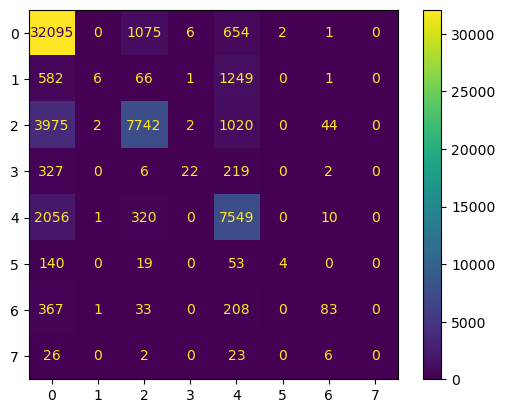

In [23]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix= cm, 
                              display_labels = ['Physics', 'Electrical Eng. and Systems Sc.' , 'Mathematics', 'Computer Science', 'Statistics']
                              )
disp.plot(xticks_rotation = 'vertical')
plt.show()

As we can see the Accuracy is not very good, so lets try to improve this. I know that the count per categories are:\
\
Physics 112627\
Electrical Engineering and Systems Science 6621\
Mathematics 52148\
Quantitative Biology 3687\
Computer Science 49190\
Quantitative Finance 1493\
Statistics 9555\
Economics 775

So I will drop the categories with less than 5000 papers: Quantitative Biology, Quantitative Finance and Economics.\
But also drop a half of Physics category, to have a more balanced dataframe.

I will join df_subset_abstracts and categories dataframes to don´t lose the relation between them and drop using the columns of lectrical Engineering and Systems Science, Quantitative Biology, Quantitative Finance and Economics.

In [ ]:
df_to_drop = df_subset_abstracts.join(categories)

condition = (df_to_drop['Quantitative Biology'] == 1) | \
            (df_to_drop['Quantitative Finance'] == 1) | \
            (df_to_drop['Economics'] == 1)

df_to_drop = df_to_drop[~condition]

physics_df = df_to_drop[df_to_drop['Physics'] == 1]

df_physics_to_drop = physics_df.sample(frac=0.5, random_state=1).index

df_to_drop = df_to_drop.drop(df_physics_to_drop)

df_to_drop


,abstract,Physics,Electrical Engineering and Systems Science,Mathematics,Quantitative Biology,Computer Science,Quantitative Finance,Statistics,Economics
0,High-precision measurements in neutrino osci...,1,0,0,0,0,0,0,0
2,We re-interpret the anomaly cancellation con...,1,0,0,0,0,0,0,0
3,Software reliability growth models (SRGM) en...,0,1,0,0,1,0,0,0
4,End-to-end singing voice synthesis (SVS) is ...,0,1,0,0,1,0,0,0
5,Keypoint detection and description play a pi...,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
199994,Within the framework of a relativistic trans...,1,0,0,0,0,0,0,0
199995,The availability of real-world datasets is t...,0,0,0,0,1,0,0,0
199996,We investigate the boundedness of unimodular...,0,0,1,0,0,0,0,0
199997,We study the free XXZ quantum spin model def...,1,0,1,0,0,0,0,0


In [ ]:
df_subset_abstracts = df_to_drop[['abstract']]
df_subset_abstracts

,abstract
0,High-precision measurements in neutrino osci...
2,We re-interpret the anomaly cancellation con...
3,Software reliability growth models (SRGM) en...
4,End-to-end singing voice synthesis (SVS) is ...
5,Keypoint detection and description play a pi...
...,...
199994,Within the framework of a relativistic trans...
199995,The availability of real-world datasets is t...
199996,We investigate the boundedness of unimodular...
199997,We study the free XXZ quantum spin model def...


In [ ]:
categories = df_to_drop[['Physics', 'Electrical Engineering and Systems Science' , 'Mathematics', 'Computer Science', 'Statistics']]
categories

,Physics,Electrical Engineering and Systems Science,Mathematics,Computer Science,Statistics
0,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,1,0
4,0,1,0,1,0
5,0,0,0,1,0
...,...,...,...,...,...
199994,1,0,0,0,0
199995,0,0,0,1,0
199996,0,0,1,0,0
199997,1,0,1,0,0


Lets try to see if this improves the accuracy of the model

### Final results with RandomForestClassifier

In [ ]:
documents = [TaggedDocument(simple_preprocess(text), [i]) for i, text in enumerate(df_subset_abstracts['abstract'])]
model = Doc2Vec(vector_size=200, window=5, min_count=1, workers=4)
model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=10)
document_embeddings = [model.infer_vector(doc.words) for doc in documents]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(document_embeddings, categories, test_size=0.3, random_state=42)

classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.6164738635818173
              precision    recall  f1-score   support

           0       0.93      0.74      0.82     16710
           1       0.67      0.00      0.00      1920
           2       0.88      0.58      0.70     14131
           3       0.87      0.75      0.81     13920
           4       0.94      0.03      0.07      2668

   micro avg       0.90      0.63      0.74     49349
   macro avg       0.86      0.42      0.48     49349
weighted avg       0.89      0.63      0.71     49349
 samples avg       0.73      0.68      0.70     49349



c:\Users\Ramón\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ramón\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


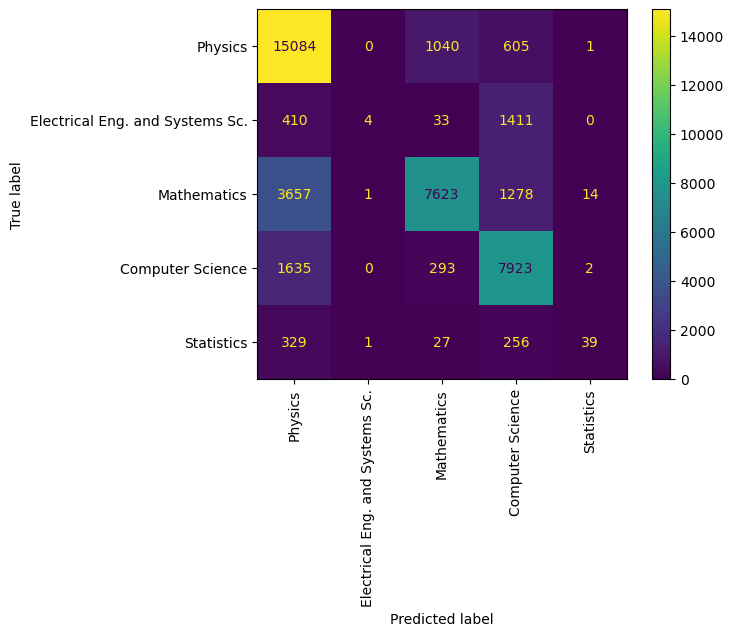

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix= cm, 
                              display_labels = ['Physics', 'Electrical Eng. and Systems Sc.' , 'Mathematics', 'Computer Science', 'Statistics']
                              )
disp.plot(xticks_rotation = 'vertical')
plt.show()

### Final results with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(document_embeddings, categories, test_size=0.3, random_state=42)

classifier = MultiOutputClassifier(LogisticRegression(multi_class = "ovr", random_state=42))

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.6749627994047904
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     16710
           1       0.54      0.19      0.28      1920
           2       0.81      0.74      0.77     14131
           3       0.88      0.81      0.85     13920
           4       0.68      0.35      0.46      2668

   micro avg       0.86      0.76      0.81     49349
   macro avg       0.76      0.59      0.65     49349
weighted avg       0.85      0.76      0.79     49349
 samples avg       0.82      0.80      0.79     49349



c:\Users\Ramón\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ramón\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The time execution was of only 3.9 seconds vs 9 minutes with 42 seconds of the Random Forest model.

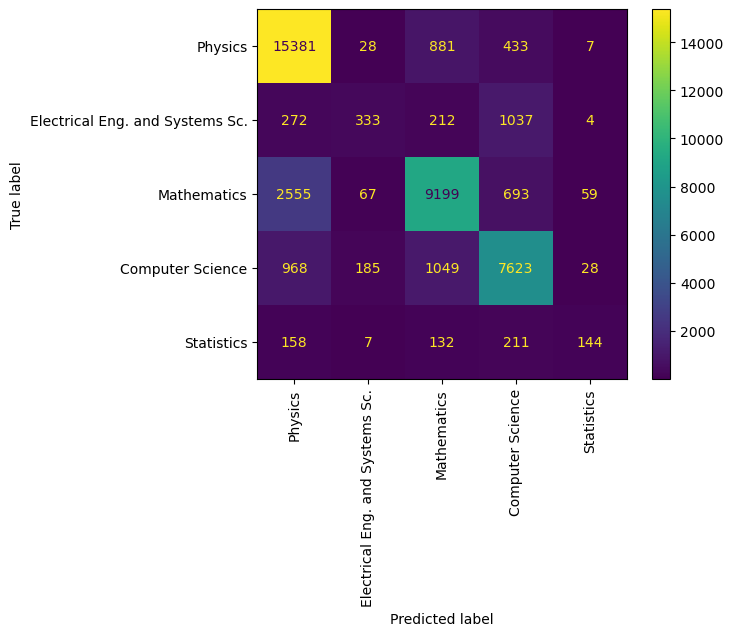

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix= cm, 
                              display_labels = ['Physics', 'Electrical Eng. and Systems Sc.' , 'Mathematics', 'Computer Science', 'Statistics']
                              )
disp.plot(xticks_rotation = 'vertical')
plt.show()

NameError: name 'LogisticRegression' is not defined